## Assignment 04
Name: Yan Qinlin  
SID: 12231096  
Due: 2022/11/29

In [1]:
import random
from math import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime
import netCDF4
import xarray as xr
%matplotlib inline
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.mpl.ticker import LongitudeFormatter,LatitudeFormatter
import cartopy.io.shapereader as shapereader
plt.rcParams['font.sans-serif'] = ['SimHei']

**Ref:** All the programming details were referred to the handout of course ESE5023 by professor Zhu (https://zhu-group.github.io/ese5023).

## 1. Global Earthquakes

**Data reference:** The relief data is downloaded from Natural Earth (https://www.naturalearthdata.com/downloads/).

In [112]:
df1 = pd.read_csv("usgs_earthquakes.csv")
df1.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type
0,2014-01-31 23:53:37.000,60.252000,-152.7081,90.20,1.10,ml,NaN,NaN,NaN,0.2900,ak,ak11155107,2014-02-05T19:34:41.515Z,"26km S of Redoubt Volcano, Alaska",earthquake
1,2014-01-31 23:48:35.452,37.070300,-115.1309,0.00,1.33,ml,4.0,171.43,0.34200,0.0247,nn,nn00436847,2014-02-01T01:35:09.000Z,"32km S of Alamo, Nevada",earthquake
2,2014-01-31 23:47:24.000,64.671700,-149.2528,7.10,1.30,ml,NaN,NaN,NaN,1.0000,ak,ak11151142,2014-02-01T00:03:53.010Z,"12km NNW of North Nenana, Alaska",earthquake
3,2014-01-31 23:30:54.000,63.188700,-148.9575,96.50,0.80,ml,NaN,NaN,NaN,1.0700,ak,ak11151135,2014-01-31T23:41:25.007Z,"22km S of Cantwell, Alaska",earthquake
4,2014-01-31 23:30:52.210,32.616833,-115.6925,10.59,1.34,ml,6.0,285.00,0.04321,0.2000,ci,ci37171541,2014-02-01T00:13:20.107Z,"10km WNW of Progreso, Mexico",earthquake


In [113]:
#读入数据并查看
df1 = pd.read_csv("usgs_earthquakes.csv")
#删除mag列空值所在行
df1.dropna(subset=['mag'],inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120065 entries, 0 to 120107
Data columns (total 15 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   time       120065 non-null  object 
 1   latitude   120065 non-null  float64
 2   longitude  120065 non-null  float64
 3   depth      120065 non-null  float64
 4   mag        120065 non-null  float64
 5   magType    120065 non-null  object 
 6   nst        59653 non-null   float64
 7   gap        94893 non-null   float64
 8   dmin       85641 non-null   float64
 9   rms        119676 non-null  float64
 10  net        120065 non-null  object 
 11  id         120065 non-null  object 
 12  updated    120065 non-null  object 
 13  place      120065 non-null  object 
 14  type       120065 non-null  object 
dtypes: float64(8), object(7)
memory usage: 14.7+ MB


In [114]:
#按照mag从大到小排序
df_temp = df1.loc[df1['time'].str.contains('2014')].sort_values("mag", ascending=False)

##选出时空信息和mag
df2 = df_temp[['time','latitude','longitude','mag']]

#重新排序，并只要前50个,并打印检查
df2.reset_index(drop=True, inplace=True)
df2 = df2.loc[0:50]
df2.head(50)

,time,latitude,longitude,mag
0,2014-04-01 23:46:47.260,-19.6097,-70.7691,8.2
1,2014-06-23 20:53:09.700,51.8486,178.7352,7.9
2,2014-04-03 02:43:13.110,-20.5709,-70.4931,7.7
3,2014-04-12 20:14:39.300,-11.2701,162.1481,7.6
4,2014-04-19 13:28:00.810,-6.7547,155.0241,7.5
5,2014-04-13 12:36:19.230,-11.4633,162.0511,7.4
6,2014-10-14 03:51:34.460,12.5262,-88.1225,7.3
7,2014-04-18 14:27:24.920,17.3970,-100.9723,7.2
8,2014-04-11 07:07:23.130,-6.5858,155.0485,7.1
9,2014-11-15 02:31:41.720,1.8929,126.5217,7.1


Text(0.5, 1.0, 'Top 50 Earthquakes of 2014')

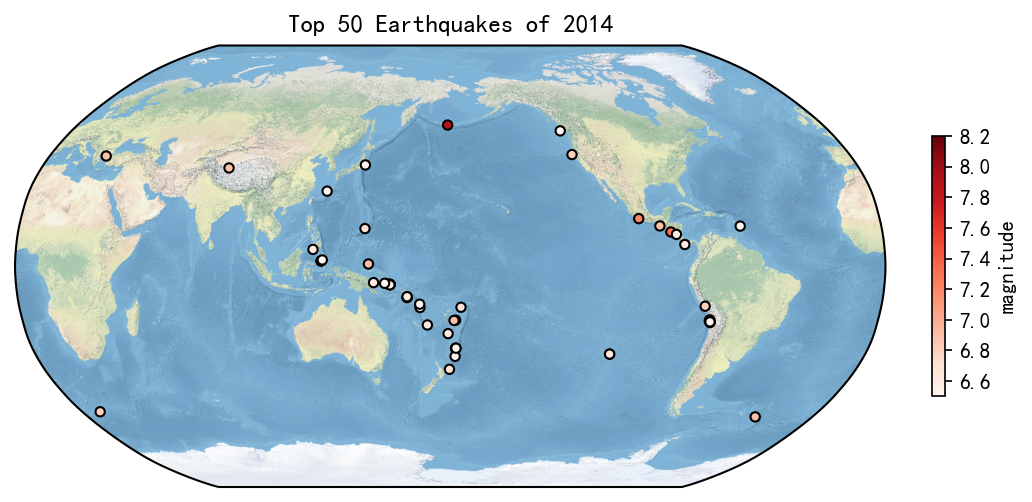

In [23]:
import matplotlib.ticker as ticker

# Create and define the size of a figure object 
plt.figure(figsize=(8,8), dpi=150)


# Create an axes with Robinson projection style，调整中心经度为180
ax = plt.axes(projection=ccrs.Robinson(central_longitude=180))

#画浮雕图
ax.imshow(plt.imread("NE1_50M_SR_W.tif"),origin='upper',transform=ccrs.PlateCarree(),extent=[-180,180,-90,90])

#选择colorbar的style
cm = plt.cm.get_cmap('Reds')

#画散点——2014年最严重（按mag）的50次地震
sc = ax.scatter(df2['longitude'],df2['latitude'], s=20,c=df2['mag'], edgecolors=['black'],cmap=cm,transform=ccrs.PlateCarree())

#定义colorbar的刻度值

#画colorbar,与老师给的图一样
c = plt.colorbar(sc,label='magnitude',fraction=0.014,pad=0.05)
tick_locator = ticker.MaxNLocator(nbins=9)
c.locator = tick_locator
c.update_ticks()

ax.set_title("Top 50 Earthquakes of 2014")


**Ref:** The usage of relief file and the overlap of both the relief and the scatter were referred to the blog of *野生的气象小流星*(https://blog.csdn.net/weixin_42372313/article/details/119885922). The usage of ticks resetting of the colorbar was referred to the blogs of *Mr.Jcak* (https://blog.csdn.net/weixin_38314865/article/details/109499030?spm=1001.2101.3001.6650.14&utm_medium=distribute.pc_relevant.none-task-blog-2%7Edefault%7ECTRLIST%7ERate-14-109499030-blog-117259630.pc_relevant_3mothn_strategy_recovery&depth_1-utm_source=distribute.pc_relevant.none-task-blog-2%7Edefault%7ECTRLIST%7ERate-14-109499030-blog-117259630.pc_relevant_3mothn_strategy_recovery&utm_relevant_index=14).

## 2. Explore a netCDF dataset

**Data Ref:**  
Xie, P., and P.A. Arkin, 1997: Global precipitation: A 17-year monthly analysis based on gauge observations, satellite estimates, and numerical model outputs. Bull. Amer. Meteor. Soc., 78, 2539 - 2558.

## 2.1

In [3]:
# Open a netCDF4 file
ds3 = xr.open_dataset("precip.mon.mean.nc", engine="netcdf4")

# Show dataset
ds3

#按月度统计，
precip_clim = ds3.groupby('time.month').mean()


Text(0.5, 1.0, 'Global Precipitation Under LambertCylindrical Coordinate')

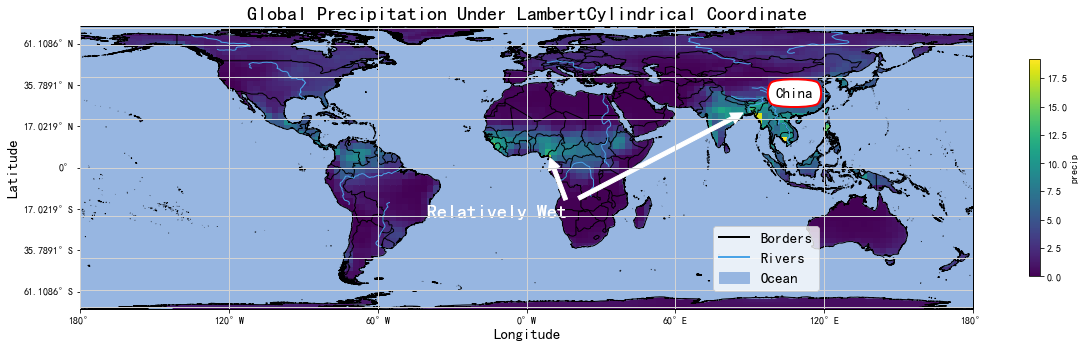

In [82]:
import matplotlib as mp
import matplotlib.patches as mpatches
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
#创建画布
fig = plt.figure(figsize=(20,10)) 

#创建投影，选择cartopy的platecarree投影
proj   = ccrs.LambertCylindrical()
ax = fig.subplots(1, 1, subplot_kw={'projection': proj})  

#画数据
precip_clim.precip.sel(month=8).plot(ax=ax, transform=ccrs.PlateCarree(),
         cbar_kwargs={'shrink': 0.4})


# Add lat/lon gridlines, draw gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,linewidth=1,color='lightgrey',zorder=5)

#设置label格式为经纬专用
ax.xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=True) )
ax.yaxis.set_major_formatter(LatitudeFormatter())

#画tick
ax.set_xticks(np.linspace(-180,180,7), crs=proj)
ax.set_yticks(np.linspace(-50,50,7), crs=proj)

#写label
ax.set_xlabel("Longitude",fontsize=15)
ax.set_ylabel("Latitude",fontsize=15)

# Mask ocean data by adding ocean feature and changing its zorder
ax.add_feature(cfeature.OCEAN, zorder=1)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.RIVERS, edgecolor='#4aa3e6', zorder=2)
ax.coastlines(resolution='10m')




#legend
legend_elements = [Line2D([0], [0], color='black', lw=2, label='Borders'),
                   Line2D([0], [0], color='#4aa3e6', lw=2, label='Rivers'),
                   Patch(facecolor='#97b6e1', edgecolor='#97b6e1',label='Ocean')]

# Create the figure
ax.legend(handles=legend_elements, fontsize=15,
    loc='lower left', bbox_to_anchor=(0.7, 0.04), fancybox=True)

#annotation & text box
t = ax.text(108, 30, "China", ha="center", va="center", rotation=0, size=15,
    bbox=dict(boxstyle="round4,pad=0.3", fc="white", ec="r", lw=2))
bb = t.get_bbox_patch()
bb.set_boxstyle("round4", pad=0.6)

#annotation 
ax.annotate('Relatively Wet', xy=(91, 24),color='white',fontsize=20,
            xytext=(-40, -20), 
            arrowprops=dict(facecolor='white',edgecolor='white',shrink=0.05))
ax.annotate('Relatively Wet', xy=(9, 5),color='white',fontsize=20,
            xytext=(-40, -20), 
            arrowprops=dict(facecolor='white',edgecolor='white',shrink=0.05))
#title
plt.title("Global Precipitation Under LambertCylindrical Coordinate",fontsize=20)

## 2.2

Text(0.5, 1.0, 'Regional Precipitation Under PlateCarree Coordinate')

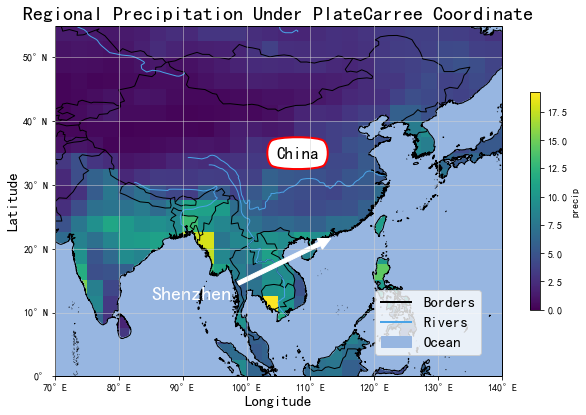

In [70]:
import matplotlib as mp
import matplotlib.patches as mpatches
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
#创建画布
fig = plt.figure(figsize=(10,10)) 

#创建投影，选择cartopy的platecarree投影
proj   = ccrs.PlateCarree()
ax = fig.subplots(1, 1, subplot_kw={'projection': proj})  

#画数据
precip_clim.precip.sel(month=8).plot(ax=ax, transform=ccrs.PlateCarree(),
         cbar_kwargs={'shrink': 0.4})

#local 局部画
ax.set_extent([70,140,0,55], crs=proj)

# Add lat/lon gridlines, draw gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,linewidth=0.5,color='lightgrey',zorder=5)

#设置label格式为经纬专用
ax.xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=True) )
ax.yaxis.set_major_formatter(LatitudeFormatter())

#画tick
ax.set_xticks(np.linspace(70,140,8), crs=proj)
ax.set_yticks(np.linspace(0,50,6), crs=proj)

#写label
ax.set_xlabel("Longitude",fontsize=15)
ax.set_ylabel("Latitude",fontsize=15)

# Mask ocean data by adding ocean feature and changing its zorder
ax.add_feature(cfeature.OCEAN, zorder=1)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.RIVERS, edgecolor='#4aa3e6', zorder=2)
ax.coastlines(resolution='10m')




#legend
legend_elements = [Line2D([0], [0], color='black', lw=2, label='Borders'),
                   Line2D([0], [0], color='#4aa3e6', lw=2, label='Rivers'),
                   Patch(facecolor='#97b6e1', edgecolor='#97b6e1',label='Ocean')]

# Create the figure
ax.legend(handles=legend_elements, fontsize=15,
    loc='lower left', bbox_to_anchor=(0.7, 0.04), fancybox=True)

#annotation & text box
t = ax.text(
    108, 35, "China", ha="center", va="center", rotation=0, size=17,
    bbox=dict(boxstyle="round4,pad=0.3", fc="white", ec="r", lw=2))
bb = t.get_bbox_patch()
bb.set_boxstyle("round4", pad=0.6)

#annotation 
ax.annotate('Shenzhen', xy=(114, 22),color='white',fontsize=20,
            xytext=(85, 12), 
            arrowprops=dict(facecolor='white',edgecolor='white',shrink=0.05))
#title
plt.title("Regional Precipitation Under PlateCarree Coordinate",fontsize=20)

**Ref:** The usage of lat/lon format and ticks were referred to the handout on ModelWhale website(https://www.heywhale.com/mw/project/620d03ab7a7c9a0017c95995).The usage of user-defined legend was referred to the official wedsite of matplotlib (https://www.osgeo.cn/matplotlib/gallery/text_labels_and_annotations/custom_legends.html).